In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

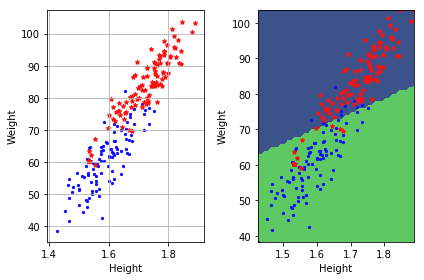

In [3]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = least_squares(y,tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [4]:
def sigmoid(t):
    """apply sigmoid function on t."""
    # ***************************************************
    return (np.exp(t)/(1+np.exp(t)))

In [18]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    # ***************************************************
    a = np.log(1 + np.exp(tx.dot(w)))
    b = y*(tx.dot(w))
    loss = np.sum(a-b)
    return loss

In [19]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    grad = (np.transpose(tx)).dot(sigmoid(tx.dot(w))-y)
    return grad

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [20]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    loss = calculate_loss(y,tx,w)
    # ***************************************************
    grad = calculate_gradient(y,tx,w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    w = w - gamma*grad
    return loss, w


Demo!

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=43.46403230562902
Current iteration=200, loss=41.54589280875939
Current iteration=300, loss=41.098638973663114
Current iteration=400, loss=40.964870635605585
Current iteration=500, loss=40.920089458713036
Current iteration=600, loss=40.90418744318991
Current iteration=700, loss=40.89834994668996
Current iteration=800, loss=40.89616496609549
Current iteration=900, loss=40.8953375338211
Current iteration=1000, loss=40.895021964119
Current iteration=1100, loss=40.894901086855555
Current iteration=1200, loss=40.89485466141426
Current iteration=1300, loss=40.89483680124478
Current iteration=1400, loss=40.89482992328358
Current iteration=1500, loss=40.8948272728955
loss=40.89482664256953


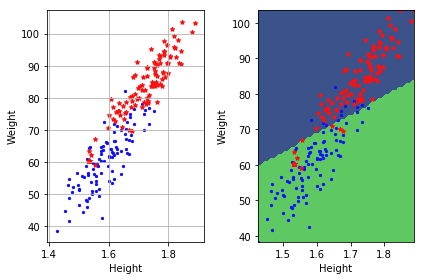

In [22]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [36]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # ***************************************************
    S = (sigmoid(tx.dot(w)))*(1-sigmoid(tx.dot(w)))
    S = np.identity(tx.shape[0])*S
    hessian = (np.transpose(tx).dot(S)).dot(tx)
    return hessian

Write a function below to return loss, gradient, and hessian.

In [37]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    loss = calculate_loss(y,tx,w)
    gradient = calculate_gradient(y,tx,w)
    hessian = calculate_hessian(y,tx,w)
    return loss, gradient, hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [45]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    loss, gradient, hessian = logistic_regression(y,tx,w)
    # ***************************************************
    hessian_inv = np.linalg.inv(hessian)
    w = w - (hessian_inv).dot(gradient)
    return loss, w

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=1, the loss=63.41155373909581
Current iteration=2, the loss=47.30458619935058
Current iteration=3, the loss=41.997467422484476
Current iteration=4, the loss=40.95639863723794
Current iteration=5, the loss=40.89511993648958
Current iteration=6, the loss=40.89482561762708
Current iteration=7, the loss=40.89482560989059
loss=40.89482560989058


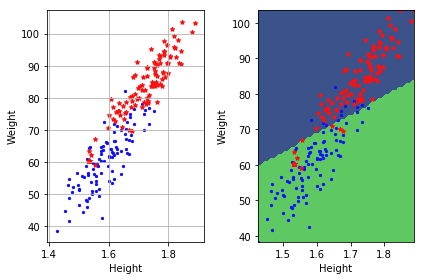

In [46]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [47]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    loss = calculate_loss(y,tx,w) + 0.5*lambda_*(np.sum(w*w))
    gradient = calculate_gradient(y,tx,w) + lambda_*(np.sum(w))
    hessian = calculate_hessian(y,tx,w) + lambda_
    return loss, gradient, hessian

In [49]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    loss, gradient, hessian = penalized_logistic_regression(y,tx,w,lambda_)
    # ***************************************************
    hessian_inv = np.linalg.inv(hessian)
    w = w - gamma*(hessian_inv).dot(gradient)
    return loss, w

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=72.20818728162564
Current iteration=200, loss=51.30338996832351
Current iteration=300, loss=44.8119581178297
Current iteration=400, loss=43.472701103802976
Current iteration=500, loss=43.38492234937784
Current iteration=600, loss=43.44394020790632
Current iteration=700, loss=43.480860693519595
Current iteration=800, loss=43.496618856921934
Current iteration=900, loss=43.50269781292203
Current iteration=1000, loss=43.50496509219568
Current iteration=1100, loss=43.50580066759747
Current iteration=1200, loss=43.50610727721502
Current iteration=1300, loss=43.50621960840612
Current iteration=1400, loss=43.50626073894476
Current iteration=1500, loss=43.506275795886424
Current iteration=1600, loss=43.50628130745981
Current iteration=1700, loss=43.50628332490683
loss=40.93396175594358


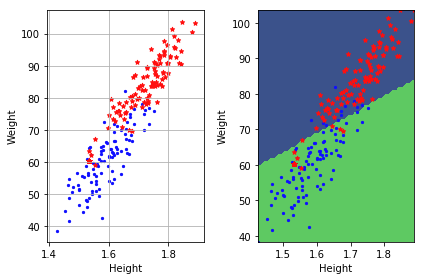

In [50]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)